In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
weather = pd.read_csv('./fullweather.csv')

In [3]:
weather

,Local time in Jeju (airport),T,WW,H,I
0,2019-04-16 0:00,11.7,NaN,47,NaN
1,2019-04-16 1:00,11.6,NaN,46,NaN
2,2019-04-16 2:00,11.4,NaN,46,NaN
3,2019-04-16 3:00,11.4,NaN,45,NaN
4,2019-04-16 4:00,11.1,NaN,44,NaN
...,...,...,...,...,...
20587,2021-08-20 19:00,29.3,NaN,63,0.14
20588,2021-08-20 20:00,28.3,NaN,69,0.00
20589,2021-08-20 21:00,27.7,NaN,74,NaN
20590,2021-08-20 22:00,27.5,NaN,74,NaN


In [4]:
weather['Local time in Jeju (airport)'] = pd.to_datetime(weather['Local time in Jeju (airport)'], format='%Y-%m-%d %H:%M', errors='raise')
weather['Date'] = weather['Local time in Jeju (airport)'].dt.date
weather['WW'][weather['WW'].notnull()] = 1
weather['WW'][weather['WW'].isnull()] = 0
weather['WW'] = pd.to_numeric(weather['WW'])


C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
temp_rain = weather.groupby('Date',as_index=False).mean()
temp_rain.rename(columns={'WW':'rain'},inplace=True)
temp_rain['Date'] = temp_rain['Date'].astype(str)

In [6]:
temp_rain

,Date,T,rain,H,I
0,2019-04-16,16.479167,0.000000,45.375000,1.387857
1,2019-04-17,16.054167,0.000000,71.125000,1.531429
2,2019-04-18,16.487500,0.000000,69.833333,1.858571
3,2019-04-19,16.958333,0.000000,75.125000,1.698571
4,2019-04-20,17.125000,0.000000,76.375000,1.622000
...,...,...,...,...,...
853,2021-08-16,24.633333,0.541667,85.625000,0.478667
854,2021-08-17,25.479167,0.291667,75.916667,1.228667
855,2021-08-18,26.004167,0.000000,71.541667,1.559333
856,2021-08-19,25.662500,0.083333,70.125000,1.094000


In [7]:
weather

,Local time in Jeju (airport),T,WW,H,I,Date
0,2019-04-16 00:00:00,11.7,0.0,47,NaN,2019-04-16
1,2019-04-16 01:00:00,11.6,0.0,46,NaN,2019-04-16
2,2019-04-16 02:00:00,11.4,0.0,46,NaN,2019-04-16
3,2019-04-16 03:00:00,11.4,0.0,45,NaN,2019-04-16
4,2019-04-16 04:00:00,11.1,0.0,44,NaN,2019-04-16
...,...,...,...,...,...,...
20587,2021-08-20 19:00:00,29.3,0.0,63,0.14,2021-08-20
20588,2021-08-20 20:00:00,28.3,0.0,69,0.00,2021-08-20
20589,2021-08-20 21:00:00,27.7,0.0,74,NaN,2021-08-20
20590,2021-08-20 22:00:00,27.5,0.0,74,NaN,2021-08-20


In [8]:
data = pd.read_csv('fulldata.csv', encoding='euc-kr')
data.drop(['year','month'],axis=1,inplace=True)

In [9]:
place = pd.read_csv('station.csv', encoding='euc-kr') #길거리에 Iot 있는 킥보드가 있는 장소

In [ ]:
data['Xpos'] = None
data['Ypos']= None

#위치 추가
for i in range(len(data)):
    for j in range(len(place)):
        if(data['rent_station'].iloc[i] == place['id'].iloc[j]):
            data['Xpos'].iloc[i] = float(round(place['x_pos'].iloc[j],3))
            data['Ypos'].iloc[i] = float(round(place['y_pos'].iloc[j],3))

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
data['Xpos'] = data['Xpos'].astype('float')
data['Ypos'] = data['Ypos'].astype('float')

In [ ]:
# data = data.iloc[:11648]

In [ ]:
data = data.iloc[:11971]

In [ ]:
#data = data.iloc[138:] #2019-08-01~
#data = data.iloc[385:] #2019-12-01~
#data = data.iloc[592:] #2020-04-01~

In [ ]:
#data = data.iloc[887:] #일정한 수요가 생기는 2020-04-30일 이후 데이터를 자름

In [ ]:
data = data.dropna(axis=0).reset_index(drop=True)

## 지역 여러개 데이터 분할

In [ ]:
NineSector_data = data.copy()
TwoSector_data = data.copy()
OneSector_data = data.copy()
FourSector_data = data.copy()
OneSector_data['Sector'] = 0

In [ ]:
OneSector_data.info()

# ========================================================

In [19]:
def preprocessing(data):
    data['rent_date'] = pd.to_datetime(data['rent_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    data['year'] =data['rent_date'].dt.year
    data['month'] =data['rent_date'].dt.month
    data['day'] =data['rent_date'].dt.day
    data['day_name'] = data['rent_date'].dt.day_name()
    data = data.sort_values(by='rent_date')
    data['rent_date'] = data['rent_date'].astype(str)
    data['T'] = None
    data['rain'] = None
    data['H'] = None
    data['I'] = None
    return data

In [20]:
def temp_rain_preprocessing(data,length,temp_length):
    for i in range(temp_length):
        for j in range(length):
            if(data['rent_date'].iloc[j] == temp_rain['Date'].iloc[i]):
                data['T'].iloc[j] = temp_rain['T'].iloc[i]
                data['H'].iloc[j] = temp_rain['H'].iloc[i]
                data['I'].iloc[j] = temp_rain['I'].iloc[i]                
                data['rain'].iloc[j] = temp_rain['rain'].iloc[i]
                if(data['rain'].iloc[j]<=0):
                    data['rain'].iloc[j] = 0
                elif((data['rain'].iloc[j]>0) and (data['rain'].iloc[j]<=0.1)):
                    data['rain'].iloc[j] = 1
                elif((data['rain'].iloc[j]>0.1) and (data['rain'].iloc[j]<=0.5)):
                    data['rain'].iloc[j] = 2
                else:
                    data['rain'].iloc[j] = 3
    data['T'] = data['T'].astype(float)
    data['H'] = data['H'].astype(float)
    data['I'] = data['I'].astype(float)
    data['rent_date']=pd.to_datetime(data['rent_date'])
    return data

In [21]:
def holiday_preprocessing(data, length):
    data['holiday'] = None
    for i in range(length):
        if((data['rent_date'].iloc[i]==datetime.datetime(2019,5,5)) or 
           (data['rent_date'].iloc[i]==datetime.datetime(2019,5,6)) or 
           (data['rent_date'].iloc[i]==datetime.datetime(2019,5,12)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,6,6)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,8,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,9,12)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,9,13)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,9,14)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,10,3)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,10,9)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,12,25)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,24)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,25)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,26)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,3,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,4,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,4,30)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,5,5)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,6,6)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,8,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,9,30)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,2)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,3)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,9)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,12,25)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,1,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,2,11)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,2,12)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,2,13)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,3,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,5,5)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,5,19)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,6,6)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,8,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,8,16)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,9,20)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,9,21)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,9,22))):
            data['holiday'].iloc[i] = 1
        else:
            data['holiday'].iloc[i] = 0
    data['holiday']=data['holiday'].astype(int)
    return data

In [22]:
def weekend_weekday_preprocessing(data,length):
    data['weekend'] = None
    for i in range(length):
        if(('Friday' == data['day_name'].iloc[i]) or ('Saturday'== data['day_name'].iloc[i]) or ('Sunday' == data['day_name'].iloc[i])):
            data['weekend'].iloc[i] = 1
        else:
            data['weekend'].iloc[i] = 0

    data['weekend']=data['weekend'].astype(int)
    return data

In [23]:
def dummy_preprocessing(data):
    data = pd.get_dummies(data, columns=['Sector'])
    return data

In [24]:
def WholePreprocessing(data):
    data = data.groupby(['rent_date','Sector'],as_index=False).sum()
    length = len(data)
    temp_length = len(temp_rain)
    data = preprocessing(data)
    data = temp_rain_preprocessing(data,length,temp_length)
    data = weekend_weekday_preprocessing(data,length)
    data = dummy_preprocessing(data)
    data = holiday_preprocessing(data, length)
    data.drop(['day_name','Xpos','Ypos'],axis=1,inplace=True)
    return data

# 지역 한개 모델

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import make_scorer, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from mlens.ensemble import BlendEnsemble
from sklearn.linear_model import LinearRegression
from mlens.ensemble import SuperLearner
from sklearn.metrics import mean_absolute_error

[MLENS] backend: threading


In [26]:
def Scatter(data):
    plt.figure(figsize=(12,8))
    data = data.groupby(['Xpos', 'Ypos'], as_index=False).sum()
    num = data['rent_number'].to_numpy()
    area = num*6
    sns.scatterplot(x='Xpos',y ='Ypos',hue='Sector',data=data,s=area, alpha=0.5)
    centers = pd.DataFrame(kmeans.cluster_centers_,columns=['Sepal length','Sepal width'])
    center_x = centers['Sepal length']
    center_y = centers['Sepal width']
    plt.xlabel('Longitude', fontsize=20)
    plt.ylabel('Latitude', fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.scatter(center_x,center_y,s=250,marker='D',c='r')
    plt.legend([],[], frameon=False)

In [27]:
def Plot(xgb_preds,y_test):

    fig, axes = plt.subplots(1,1,figsize=(8,4))
    axes.plot(xgb_preds,'r',label='predictions_value')
    axes.plot(y_test,label='real_value')
    axes.set_xlabel('Date')
    axes.set_ylabel('Rent Count')
    plt.tight_layout()
    axes.legend()
    plt.show()

In [28]:
OneSector_data = OneSector_data.groupby(['rent_date','Sector'],as_index=False).sum()
OneSector_data = WholePreprocessing(OneSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
OneSector_data

,rent_date,rent_number,day,year,month,T,rain,H,I,weekend,Sector_0,holiday
0,2019-04-16,1,16,2019,4,16.479167,0,45.375000,1.387857,0,1,0
1,2019-04-20,2,20,2019,4,17.125000,0,76.375000,1.622000,1,1,0
2,2019-04-21,2,21,2019,4,18.308333,0,69.625000,1.358000,1,1,0
3,2019-04-24,2,24,2019,4,18.420833,0,86.083333,1.126667,0,1,0
4,2019-04-25,3,25,2019,4,15.937500,0,90.833333,0.678667,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-06-07,117,7,2021,6,21.733333,0,74.000000,1.834000,0,1,0
713,2021-06-08,117,8,2021,6,24.104167,0,73.750000,1.791333,0,1,0
714,2021-06-09,143,9,2021,6,26.404167,0,74.416667,1.767333,0,1,0
715,2021-06-10,57,10,2021,6,25.462500,2,70.541667,0.567333,0,1,0


In [30]:
OneSector_data['rain'] = OneSector_data['rain'].astype(str).astype(int)

In [31]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
Two_points = pd.DataFrame().reset_index(drop=True)
Two_points['Xpos'] = TwoSector_data['Xpos']
Two_points['Ypos'] = TwoSector_data['Ypos']
kmeans = KMeans(n_clusters=2, random_state=np.random.RandomState(seed=1))
kmeans.fit(Two_points)
TwoSector_data['Sector'] = kmeans.labels_

In [32]:
TwoSector_data = WholePreprocessing(TwoSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
TwoSector_data['rain'] = TwoSector_data['rain'].astype(str).astype(int)

In [34]:
from sklearn.cluster import KMeans
Four_points = pd.DataFrame().reset_index(drop=True)
Four_points['Xpos'] = FourSector_data['Xpos']
Four_points['Ypos'] = FourSector_data['Ypos']
kmeans = KMeans(n_clusters=4, random_state=np.random.RandomState(seed=1))
kmeans.fit(Four_points)
FourSector_data['Sector'] = kmeans.labels_

In [35]:
FourSector_data = WholePreprocessing(FourSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
FourSector_data['rain'] = FourSector_data['rain'].astype(str).astype(int)

In [37]:
One_error = []
for i in range(208, 717):
    X_data = OneSector_data.drop(['rent_date','rent_number'],axis=1)
    y_data = OneSector_data['rent_number']
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = lgb.LGBMRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(float)
    One_error.append(abs(y_test.iloc[0]-pred[0]))

In [38]:
OneSector_data['error'] = None
OneSector_data['error'].iloc[208:] = One_error
OneSector_data['error'] = OneSector_data['error'].astype(float)

In [39]:
OneSector_pred = OneSector_data.iloc[208:]

In [40]:
OneSector_pred = OneSector_pred.reset_index(drop=True, inplace=False)

In [41]:
One_result = []
for i in range(467, 509):
    X_data = OneSector_pred.drop(['rent_date','rent_number'],axis=1)
    y_data = OneSector_pred['rent_number']
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = lgb.LGBMRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(float)
    One_result.append(pred[0])

In [42]:
OneSector_result = OneSector_pred[467:]
OneSector_result['pred'] = One_result

C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
OneSector_result

,rent_date,rent_number,day,year,month,T,rain,H,I,weekend,Sector_0,holiday,error,pred
467,2021-05-01,133,1,2021,5,13.300000,2,73.000000,1.269333,1,1,0,14.443358,106.869956
468,2021-05-02,175,2,2021,5,13.845833,0,65.125000,1.748000,1,1,0,47.007263,145.638813
469,2021-05-03,166,3,2021,5,14.616667,0,68.875000,1.654667,0,1,0,33.855329,127.808007
470,2021-05-04,34,4,2021,5,18.754167,2,66.708333,0.280667,0,1,0,3.274818,32.491005
471,2021-05-05,152,5,2021,5,16.962500,1,57.750000,1.816000,0,1,1,2.571276,130.560673
472,2021-05-06,148,6,2021,5,18.133333,0,44.000000,1.791333,0,1,0,8.428403,141.548983
473,2021-05-07,160,7,2021,5,19.766667,0,55.541667,1.441333,1,1,0,8.308878,145.453463
474,2021-05-08,182,8,2021,5,18.170833,0,53.458333,1.421333,1,1,0,23.757505,145.449174
475,2021-05-09,203,9,2021,5,18.954167,0,57.083333,1.708667,1,1,0,37.272709,166.572074
476,2021-05-10,141,10,2021,5,20.120833,0,63.083333,1.762000,0,1,0,10.218762,132.522155


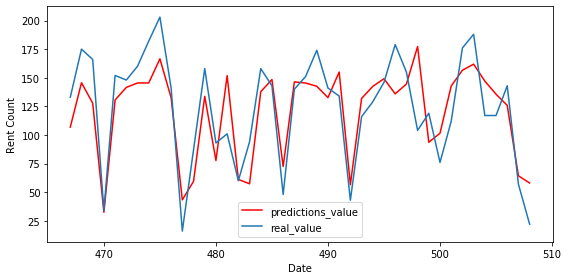

In [44]:
Plot(OneSector_result['pred'],OneSector_result['rent_number'])

In [45]:
round(r2_score(OneSector_result['pred'],OneSector_result['rent_number']), 2)

0.52

In [46]:
sqrt(mean_squared_error(OneSector_result['pred'],OneSector_result['rent_number']))

26.49338755232532

In [47]:
Two_error = []
for i in range(279, 1186):
    X_data = TwoSector_data.drop(['rent_date','rent_number'],axis=1)
    y_data = TwoSector_data['rent_number']
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = lgb.LGBMRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(float)
    Two_error.append(abs(y_test.iloc[0]-pred[0]))

TwoSector_data['error'] = None
TwoSector_data['error'].iloc[279:1186] = Two_error

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
TwoSector_pred = TwoSector_data.iloc[279:]
TwoSector_pred = TwoSector_pred.reset_index(drop=True, inplace=False)
TwoSector_pred['error'] = TwoSector_pred['error'].astype(float)

In [49]:
Two_result = []
for i in range(823, 907):
    X_data = TwoSector_pred.drop(['rent_date','rent_number'],axis=1)
    y_data = TwoSector_pred['rent_number']
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = lgb.LGBMRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(float)
    Two_result.append(pred[0])

TwoSector_result = TwoSector_pred[823:]
TwoSector_result['pred'] = Two_result

C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


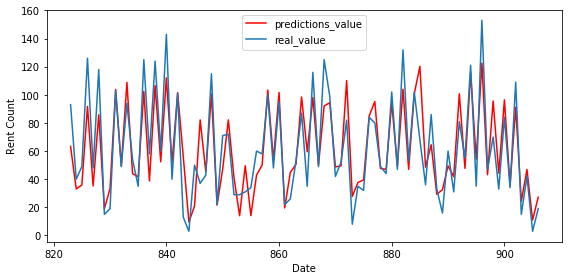

In [50]:
Plot(TwoSector_result['pred'],TwoSector_result['rent_number'])

In [51]:
round(r2_score(TwoSector_result['pred'],TwoSector_result['rent_number']), 2)

0.68

In [52]:
sqrt(mean_squared_error(TwoSector_result['pred'],TwoSector_result['rent_number']))

17.500362123598997

In [53]:
FourSector_data

,rent_date,rent_number,day,year,month,T,rain,H,I,weekend,Sector_0,Sector_1,Sector_2,Sector_3,holiday
0,2019-04-16,1,16,2019,4,16.479167,0,45.375000,1.387857,0,1,0,0,0,0
1,2019-04-20,2,20,2019,4,17.125000,0,76.375000,1.622000,1,0,1,0,0,0
2,2019-04-21,2,21,2019,4,18.308333,0,69.625000,1.358000,1,0,1,0,0,0
3,2019-04-24,2,24,2019,4,18.420833,0,86.083333,1.126667,0,1,0,0,0,0
4,2019-04-25,3,25,2019,4,15.937500,0,90.833333,0.678667,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021-06-10,15,10,2021,6,25.462500,2,70.541667,0.567333,0,1,0,0,0,0
1802,2021-06-10,23,10,2021,6,25.462500,2,70.541667,0.567333,0,0,1,0,0,0
1804,2021-06-10,2,10,2021,6,25.462500,2,70.541667,0.567333,0,0,0,0,1,0
1805,2021-06-11,3,11,2021,6,21.937500,3,94.916667,0.444000,1,1,0,0,0,0


In [54]:
Four_error = []
for i in range(363, 1807):
    X_data = FourSector_data.drop(['rent_date','rent_number'],axis=1)
    y_data = FourSector_data['rent_number']
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = lgb.LGBMRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(float)
    Four_error.append(abs(y_test.iloc[0]-pred[0]))

FourSector_data['error'] = None
FourSector_data['error'].iloc[363:1807] = Four_error

FourSector_pred = FourSector_data.iloc[363:]
FourSector_pred = FourSector_pred.reset_index(drop=True, inplace=False)
FourSector_pred['error'] = FourSector_pred['error'].astype(float)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
FourSector_pred[:1280]

,rent_date,rent_number,day,year,month,T,rain,H,I,weekend,Sector_0,Sector_1,Sector_2,Sector_3,holiday,error
0,2020-01-01,2,1,2020,1,4.779167,0,62.541667,0.350909,0,0,0,1,0,1,0.764228
1,2020-01-03,2,3,2020,1,9.012500,0,66.625000,0.450909,1,1,0,0,0,0,0.850089
2,2020-01-04,3,4,2020,1,7.937500,0,66.625000,0.918182,1,1,0,0,0,0,1.593552
3,2020-01-05,2,5,2020,1,8.320833,0,62.625000,0.890000,1,1,0,0,0,0,0.029105
4,2020-01-05,7,5,2020,1,8.320833,0,62.625000,0.890000,1,0,0,1,0,0,5.142107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2021-04-29,58,29,2021,4,18.612500,1,62.333333,1.678000,0,1,0,0,0,0,4.599000
1276,2021-04-30,32,30,2021,4,16.708333,2,60.333333,1.786000,1,1,0,0,0,0,9.281158
1277,2021-04-30,59,30,2021,4,16.708333,2,60.333333,1.786000,1,0,1,0,0,0,17.093552
1278,2021-04-30,22,30,2021,4,16.708333,2,60.333333,1.786000,1,0,0,1,0,0,2.211538


In [56]:
Four_result = []
for i in range(1280, 1444):
    X_data = FourSector_pred.drop(['rent_date','rent_number'],axis=1)
    y_data = FourSector_pred['rent_number']
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = lgb.LGBMRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(float)
    Four_result.append(pred[0])

FourSector_result = FourSector_pred[1280:]
FourSector_result['pred'] = Four_result

C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


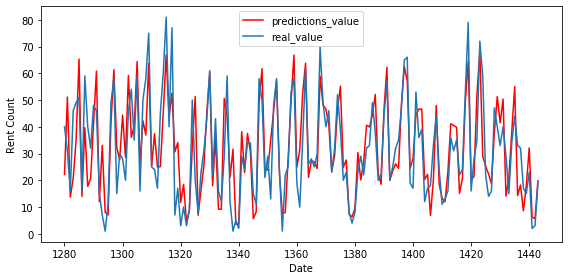

In [57]:
Plot(FourSector_result['pred'],FourSector_result['rent_number'])

In [58]:
round(r2_score(FourSector_result['pred'],FourSector_result['rent_number']), 2)

0.59

In [59]:
sqrt(mean_squared_error(FourSector_result['pred'],FourSector_result['rent_number']))

10.851021805888077

# ------------------------------------------------------